In [1]:
%pylab inline
import pandas as pd
import numpy as np
import os
import sklearn
from scipy.misc import imread 

Populating the interactive namespace from numpy and matplotlib


In [2]:
seed = 123
rng = np.random.RandomState(seed)

In [3]:
#changing the working directory

os.chdir("E:\\AV\\case study\\mnist - unsupervised deep learning")

In [4]:
train = pd.read_csv("train\\train\\train.csv")
test = pd.read_csv("Test.csv")

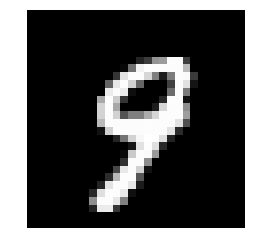

In [9]:
#plotting of an image

img_name = rng.choice(train.filename)

filepath = os.path.join('E:\\AV\\case study\\mnist - unsupervised deep learning\\Train\\Train\\Images','train',img_name)
img = imread(filepath,flatten=True)

pylab.imshow(img,cmap='gray')
pylab.axis('off')
pylab.show()

In [10]:
#reading all the images and converting them to a numpy array

temp =[]

for img_name in train.filename:
    filepath = os.path.join('E:\\AV\\case study\\mnist - unsupervised deep learning\\Train\\Train\\Images','train',img_name)
    img = imread(filepath,flatten=True)
    img = img.astype('float32')
    temp.append(img)



In [12]:
img.shape

(28, 28)

In [13]:
train_x = np.stack(temp)
train_x/= 255.0
train_x = train_x.reshape(-1,784).astype('float32')

In [14]:
train_x.shape

(49000, 784)

In [20]:
train_y = train.label.values

In [22]:
#similarly for test data

temp =[]

for img_name in test.filename:
    filepath = os.path.join('E:\\AV\\case study\\mnist - unsupervised deep learning\\Train\\Train\\Images','test',img_name)
    img = imread(filepath,flatten=True)
    img = img.astype('float32')
    temp.append(img)

test_x = np.stack(temp)
test_x/= 255.0
test_x = test_x.reshape(-1,784).astype('float32')

In [23]:
#split the train into validation and train

split = int(train_x.shape[0]*0.7)

train_x,val_x = train_x[:split],train_x[split:]
train_y,val_y = train_y[:split],train_y[split:]

In [37]:
from keras import callbacks
from keras.models import Model,Sequential
from keras.optimizers import sgd
from keras.layers import Dense,Input,Dropout

In [25]:
# implementing auto encoder

#this is input plaeholder
input_img = Input(shape=(784,))
corrupt_img = Dropout(0.5)(input_img)

In [26]:
#encoded

encoded = Dense(500,activation='relu')(corrupt_img)
encoded = Dense(500,activation='relu')(encoded)
encoded = Dense(2000,activation='relu')(encoded)
encoded = Dense(10,activation='sigmoid')(encoded)

#decoded

decoded = Dense(2000,activation='relu')(encoded)
decoded = Dense(500,activation='relu')(decoded)
decoded = Dense(500,activation='relu')(decoded)
decoded = Dense(784)(decoded)

#model to map an input to its reconstruction

autoencoder = Model(input_img,decoded)

In [28]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000     
__________

In [29]:
#  this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [30]:
autoencoder.compile(optimizer='adam',loss='mse')

In [31]:
#Now let us train our autoencoder model.
train_history = autoencoder.fit(train_x, train_x, epochs=100, batch_size=2048, validation_data=(val_x, val_x))

Train on 34300 samples, validate on 14700 samples
Epoch 1/100
34300/34300 [==============================] - 34s - loss: 0.0786 - val_loss: 0.0660
Epoch 2/100
34300/34300 [==============================] - 33s - loss: 0.0650 - val_loss: 0.0651
Epoch 3/100
34300/34300 [==============================] - 37s - loss: 0.0635 - val_loss: 0.0625
Epoch 4/100
34300/34300 [==============================] - 33s - loss: 0.0603 - val_loss: 0.0612
Epoch 5/100
34300/34300 [==============================] - 35s - loss: 0.0578 - val_loss: 0.0592
Epoch 6/100
34300/34300 [==============================] - 40s - loss: 0.0564 - val_loss: 0.0574
Epoch 7/100
34300/34300 [==============================] - 41s - loss: 0.0551 - val_loss: 0.0557
Epoch 8/100
34300/34300 [==============================] - 40s - loss: 0.0527 - val_loss: 0.0537
Epoch 9/100
34300/34300 [==============================] - 40s - loss: 0.0489 - val_loss: 0.0469
Epoch 10/100
34300/34300 [==============================] - 40s - loss: 0.044

34300/34300 [==============================] - 35s - loss: 0.0189 - val_loss: 0.0179
Epoch 85/100
34300/34300 [==============================] - 33s - loss: 0.0187 - val_loss: 0.0180
Epoch 86/100
34300/34300 [==============================] - 32s - loss: 0.0187 - val_loss: 0.0183
Epoch 87/100
34300/34300 [==============================] - 32s - loss: 0.0187 - val_loss: 0.0178
Epoch 88/100
34300/34300 [==============================] - 32s - loss: 0.0185 - val_loss: 0.0178
Epoch 89/100
34300/34300 [==============================] - 32s - loss: 0.0185 - val_loss: 0.0179
Epoch 90/100
34300/34300 [==============================] - 32s - loss: 0.0184 - val_loss: 0.0182
Epoch 91/100
34300/34300 [==============================] - 31s - loss: 0.0185 - val_loss: 0.0178
Epoch 92/100
34300/34300 [==============================] - 32s - loss: 0.0184 - val_loss: 0.0176
Epoch 93/100
34300/34300 [==============================] - 32s - loss: 0.0183 - val_loss: 0.0177
Epoch 94/100
34300/34300 [=======

In [32]:
pred_auto_train = encoder.predict(train_x)
pred_auto = encoder.predict(val_x)

In [33]:
pred_auto_train.shape

(34300, 10)

In [35]:
pred_auto.shape

(14700, 10)

In [39]:
mlp = Sequential()
mlp.add(Dense(1000,input_dim = 10,activation='sigmoid'))
mlp.add(Dense(500,activation='relu'))
mlp.add(Dense(200,activation='relu'))
mlp.add(Dense(10,activation='softmax'))
mlp.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1000)              11000     
_________________________________________________________________
dense_14 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_15 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2010      
Total params: 613,710
Trainable params: 613,710
Non-trainable params: 0
_________________________________________________________________


In [54]:
import keras

In [55]:
train_y = keras.utils.to_categorical(train_y,10)

In [57]:
train_y.shape

(34300, 10)

In [59]:
mlp_train = mlp.fit(pred_auto_train,train_y,epochs=50,verbose=1,batch_size=32,validation_split=0.1)

Train on 30870 samples, validate on 3430 samples
Epoch 1/50
30870/30870 [==============================] - 23s - loss: 0.8906 - acc: 0.6786 - val_loss: 0.5082 - val_acc: 0.8344
Epoch 2/50
30870/30870 [==============================] - 23s - loss: 0.4761 - acc: 0.8408 - val_loss: 0.4537 - val_acc: 0.8525
Epoch 3/50
30870/30870 [==============================] - 23s - loss: 0.3836 - acc: 0.8760 - val_loss: 0.3433 - val_acc: 0.8843
Epoch 4/50
30870/30870 [==============================] - 23s - loss: 0.3394 - acc: 0.8915 - val_loss: 0.4198 - val_acc: 0.8682
Epoch 5/50
30870/30870 [==============================] - 23s - loss: 0.3095 - acc: 0.8998 - val_loss: 0.3287 - val_acc: 0.8924
Epoch 6/50
30870/30870 [==============================] - 23s - loss: 0.3004 - acc: 0.9014 - val_loss: 0.2915 - val_acc: 0.9096
Epoch 7/50
30870/30870 [==============================] - 23s - loss: 0.2880 - acc: 0.9063 - val_loss: 0.2538 - val_acc: 0.9184
Epoch 8/50
30870/30870 [==============================]

In [63]:
preds =mlp.predict_classes(pred_auto)

14700/14700 [==============================] - 1s     


In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [65]:
confusion_matrix(val_y,preds)

array([[1443,    0,    4,    0,    0,    5,    2,    0,   10,    6],
       [   0, 1581,    4,    2,    1,    2,    1,    3,   16,    3],
       [  11,   18, 1373,   27,    1,    3,    0,    9,   36,    3],
       [   0,    4,    2, 1412,    0,   30,    0,    7,   69,    4],
       [   2,    1,    3,    1, 1344,    3,    5,    1,   10,   66],
       [   4,    0,    0,   29,    0, 1257,   17,    0,   22,    7],
       [   2,    2,    0,    1,    3,    7, 1399,    0,    9,    1],
       [   1,    3,    9,    9,    8,    2,    1, 1458,    6,   24],
       [   4,    7,    0,   13,    0,   11,    1,    0, 1375,   10],
       [   3,    1,    4,   15,    6,    6,    0,   12,   10, 1413]])

In [67]:
accuracy_score(val_y,preds)

0.95612244897959187

In [69]:
pred_auto_test = encoder.predict(test_x)

In [71]:
test_preds = mlp.predict_classes(pred_auto_test)

20864/21000 [============================>.] - ETA: 0s

In [72]:
test_preds

array([4, 0, 9, ..., 6, 6, 2], dtype=int64)

In [75]:
output = pd.DataFrame(test_preds,)
output.to_csv( "preds.csv", index=False, quoting=3 )

In [76]:
test_preds.shape

(21000,)

In [ ]:
#cnn
from keras.layers import 